In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/montreal-crime-data/Montreal Crime Data.csv
/kaggle/input/montral-crimes/interventionscitoyendo.csv


## Montreal Crime Analysis
Analyse crime data from Montreal between 2015 and 2021

1. Which Montreal neighbourhoods have a higher number of reported crimes?
2. Most frequent crimes by neighbourhood
3. Number of reported crimes committed annualy in Montreal
4. What are the general trends in the reported crimes from 2015-2021?
5. On what days and months are a higher number of crimes reported? 

## Import libraries and read the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
crimes = pd.read_csv("/kaggle/input/montreal-crime-data/Montreal Crime Data.csv")

In [4]:
crimes.head()

,Unnamed: 0,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude
0,0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
1,1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
2,2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
3,3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
4,4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569


In [5]:
crimes.shape

(136642, 10)

In [6]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136642 entries, 0 to 136641
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     136642 non-null  int64  
 1   category       136642 non-null  object 
 2   date           136642 non-null  object 
 3   postal_code    136642 non-null  object 
 4   city           136642 non-null  object 
 5   neighbourhood  136642 non-null  object 
 6   year           136642 non-null  int64  
 7   count          136642 non-null  int64  
 8   longitude      136642 non-null  float64
 9   latitude       136642 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 10.4+ MB


## Cleaning data

In [7]:
#drop the Unnamed column since it has no information
crimes = crimes.drop("Unnamed: 0", axis = 1)
crimes.head()

,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude
0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569


In [8]:
#check for null values
crimes.isnull().sum()

category         0
date             0
postal_code      0
city             0
neighbourhood    0
year             0
count            0
longitude        0
latitude         0
dtype: int64

In [9]:
#turn the Date column into date type insted of object
crimes["date"] = pd.to_datetime(crimes["date"])

## Visualization

### Which neighbourhoods have a higher number of reported crimes?

In [10]:
top_neighbourhoods = pd.DataFrame(crimes["neighbourhood"].value_counts()).rename({"neighbourhood":"Case Reported"}, axis = 1).rename_axis("neighbourhood").head(10)
top_neighbourhoods

,Case Reported
neighbourhood,
Plateau Mont-Royal,10844
Centre-Sud,7849
Downtown Montreal,7565
Mercier,7302
Montréal-Nord,6913
Rosemont,5907
Ahuntsic,5575
Petite-Patrie,5327
Saint-Laurent,5094


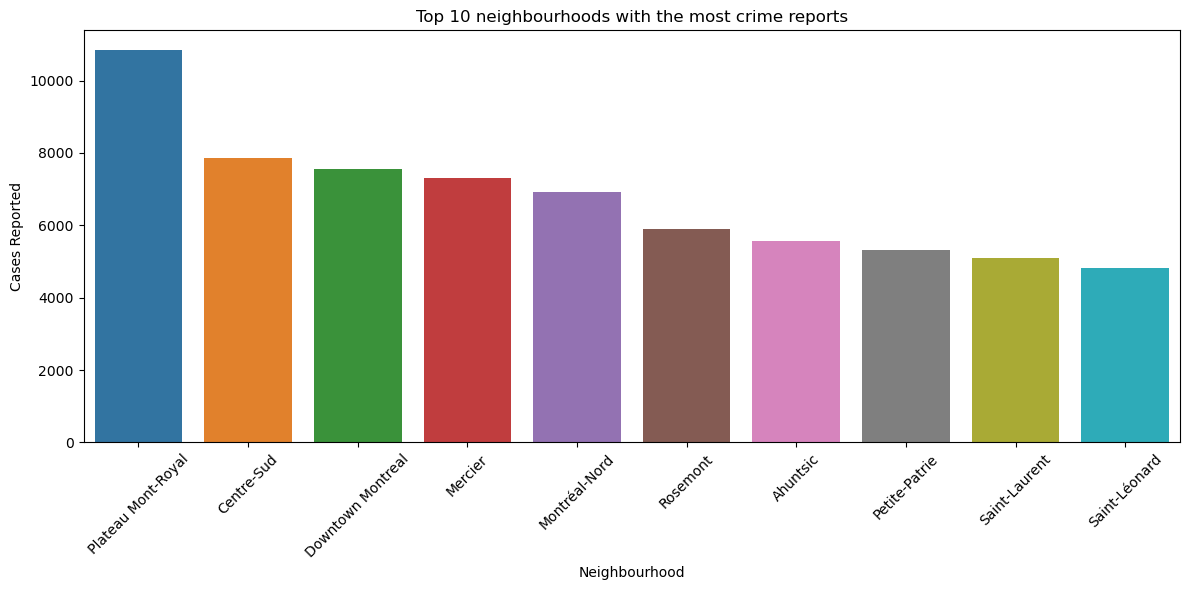

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_neighbourhoods.index, y="Case Reported", data=top_neighbourhoods)

plt.xlabel('Neighbourhood')
plt.ylabel('Cases Reported')
plt.title('Top 10 neighbourhoods with the most crime reports')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Most frequent crimes in the top neighbourhood

In [12]:
#crime count in the top neighbourhoods
top_neighbourhood = crimes['neighbourhood'].value_counts().head(10).index
top_neighbourhoods_crimes = crimes[crimes['neighbourhood'].isin(top_neighbourhood)]
crime_count = top_neighbourhoods_crimes.groupby('neighbourhood')['category'].count().sort_values(ascending=False).index
crime_count

Index(['Plateau Mont-Royal', 'Centre-Sud', 'Downtown Montreal', 'Mercier',
       'Montréal-Nord', 'Rosemont', 'Ahuntsic', 'Petite-Patrie',
       'Saint-Laurent', 'Saint-Léonard'],
      dtype='object', name='neighbourhood')

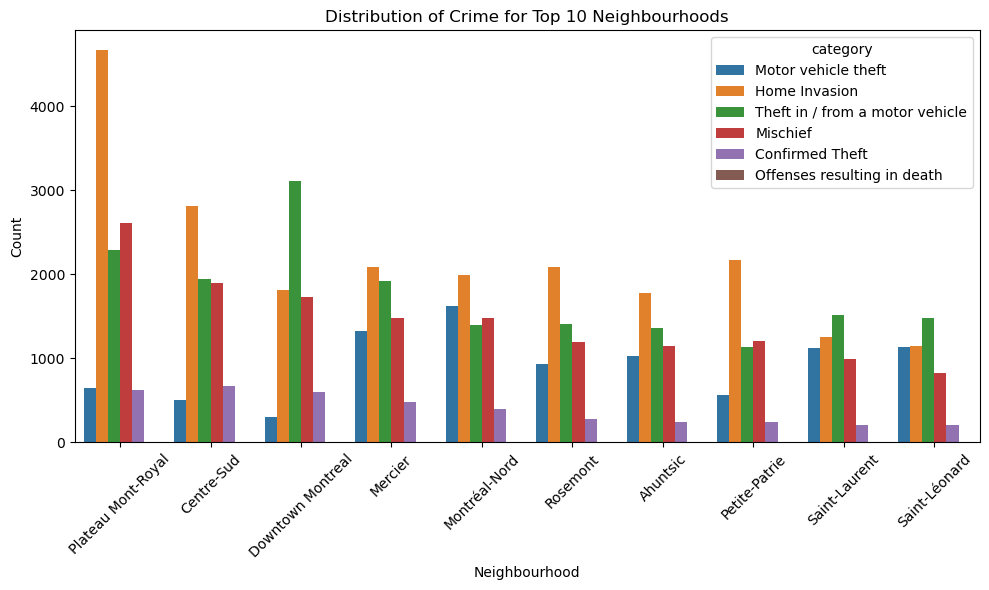

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=top_neighbourhoods_crimes, x='neighbourhood', hue='category', order=crime_count)

plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Distribution of Crime for Top 10 Neighbourhoods')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Number of reported crimes committed annualy in Montreal

In [14]:
pd.DataFrame(crimes['year'].value_counts()).rename({'year':'Case Reported'}, axis=1).rename_axis('Year')

,Case Reported
Year,
2015,24222
2016,23407
2017,22611
2018,19419
2019,18650
2020,17786
2021,10547


### What are the general trends in the reported crimes from 2015-2021?

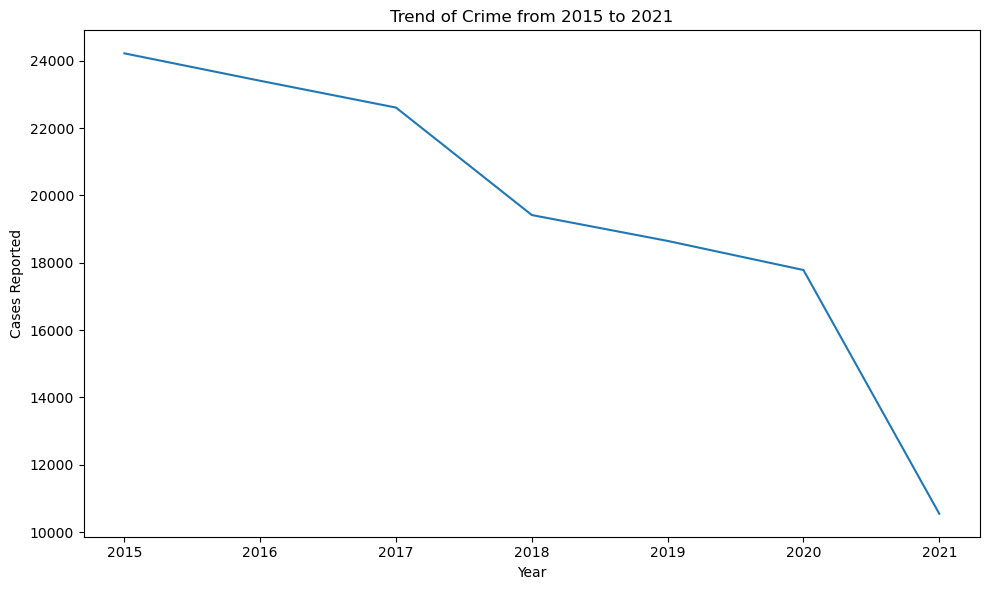

In [15]:
#DO THE CRIME RATES INCREASE OR DECREASE?
year_trend = crimes.groupby('year').sum(numeric_only=True).drop(['longitude','latitude'], axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(data=year_trend, x=year_trend.index, y='count')

plt.xlabel('Year')
plt.ylabel('Cases Reported')
plt.title('Trend of Crime from 2015 to 2021')

plt.tight_layout()
plt.show()

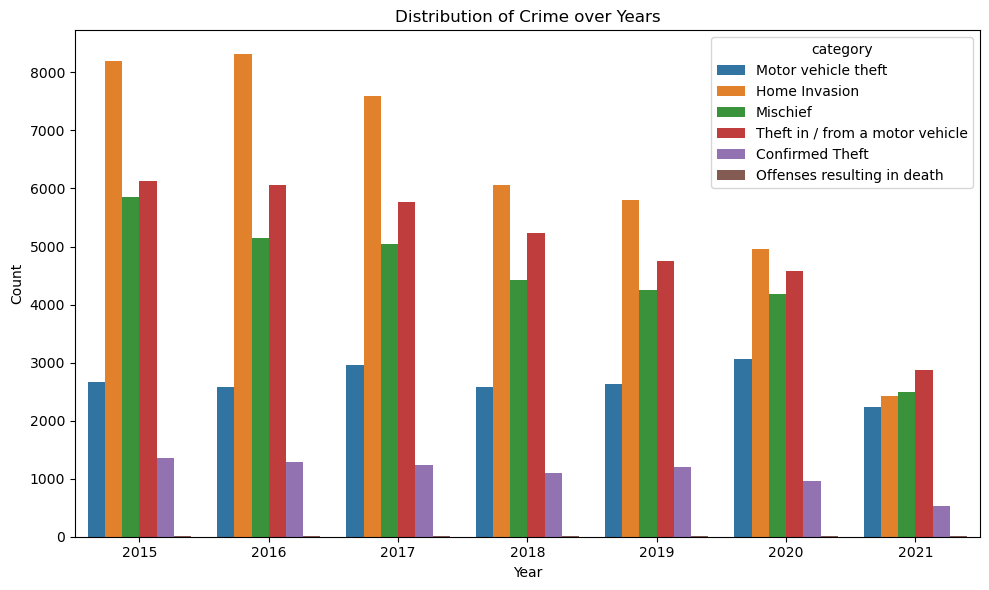

In [16]:
#TRENDS IN THE CATEGORY OVER THE YEARS
plt.figure(figsize=(10, 6))
sns.countplot(data=crimes, x='year', hue='category')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Crime over Years')

plt.tight_layout()
plt.show()

### On what days and months are a higher number of crimes reported?

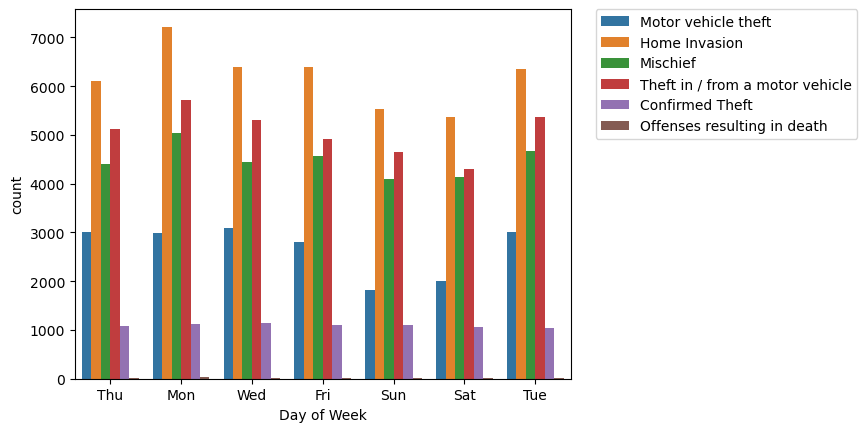

In [17]:
crimes['Month'] = crimes['date'].apply(lambda time: time.month)
crimes['Day of Week'] = crimes['date'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
crimes['Day of Week'] = crimes['Day of Week'].map(dmap)

sns.countplot(x='Day of Week',data=crimes,hue='category')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

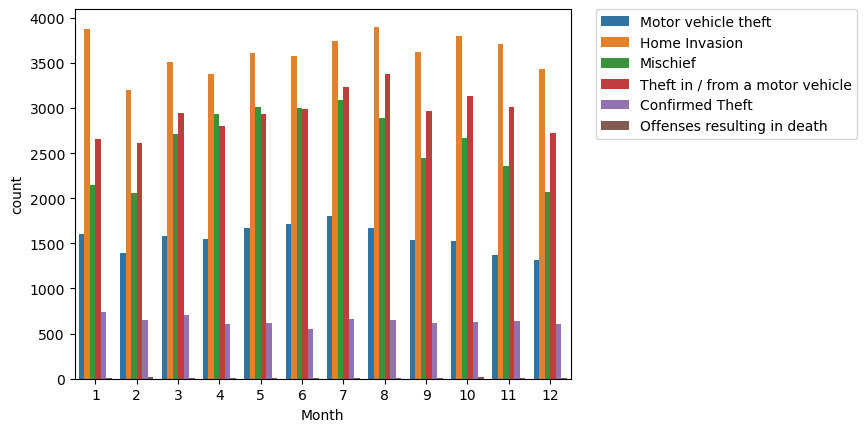

In [18]:
sns.countplot(x='Month', data=crimes, hue='category')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)